**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

**Loading Datasets**

In [ ]:
world_cup = pd.read_csv("world_cup_dataset.csv")
results = pd.read_csv("results.csv")

In [ ]:
world_cup.head(25)

,Team,Group,Previous \r\nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\r\n semifinals,Current \r rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4
5,Sri Lanka,A,11,1,3,4,9
6,Afghanistan,A,1,0,0,0,10
7,Australia,A,11,5,6,7,5
8,Bangladesh,A,5,0,0,0,7
9,India,A,11,2,3,6,2


In [ ]:
results.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,04-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,05-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,07-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,08-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [ ]:
results.shape

(996, 6)

**Data Cleaning**

In [ ]:
worldcup_teams = ['India', 'Pakistan','Afghanistan','Sri Lanka','Bangladesh','Australia','England','South Africa','New Zealand', 'West Indies']
df = results[(results['Team_1'].isin(worldcup_teams)) | (results['Team_2'].isin(worldcup_teams))]
asia = df.iloc[:]
asia.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,04-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,05-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,07-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,08-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [ ]:
asia.shape

(909, 6)

In [ ]:
year = []
for row in asia['date']:
    year.append(int(row[7:]))
asia ['match_year']= year
asia_2010 = asia[asia.match_year >= 10 ]
asia_2010.head()

,date,Team_1,Team_2,Winner,Margin,Ground,match_year
0,04-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,10
1,05-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,10
2,07-Jan-10,Bangladesh,India,India,6 wickets,Dhaka,10
3,08-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,10
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka,10


In [ ]:
asia_2010.shape

(909, 7)

In [ ]:
list1= ['Canada','Ireland','Kenya','Scotland','U.A.E.','Netherlands','Hong Kong','Zimbabwe']
asia = asia_2010[(asia_2010['Team_1'].isin(list1)) | (asia_2010['Team_2'].isin(list1) )].index
asia_new = asia_2010.drop(asia,inplace = False)
asia_new.count()

date          688
Team_1        688
Team_2        688
Winner        688
Margin        651
Ground        688
match_year    688
dtype: int64

In [ ]:
asia_new.shape

(688, 7)

**Data Visualization**

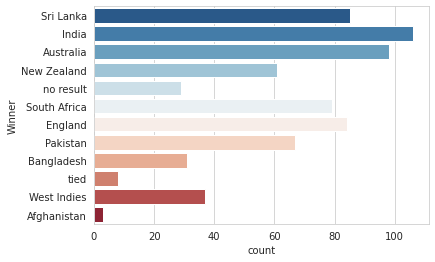

In [ ]:
sns.set_style('whitegrid')
sns.countplot(y='Winner',data=asia_new,palette='RdBu_r')

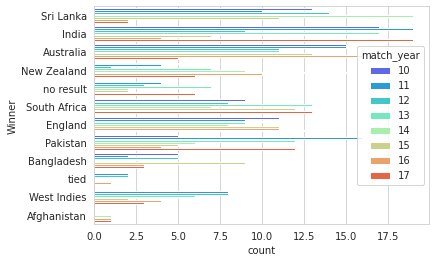

In [ ]:
sns.set_style('whitegrid')
sns.countplot(y='Winner',hue='match_year',data=asia_new,palette='rainbow')

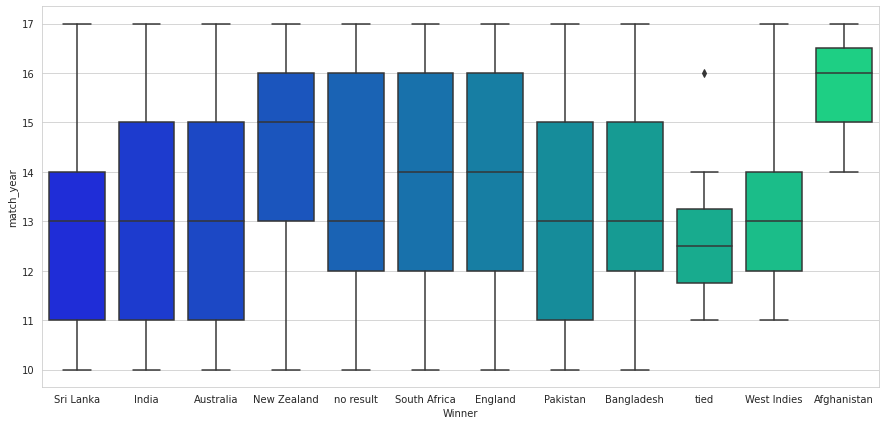

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Winner',y='match_year',data=asia_new,palette='winter')

In [ ]:
asia_new = asia_new.drop(['date','Margin', 'Ground'], axis=1)
asia_new.head()

,Team_1,Team_2,Winner,match_year
0,Bangladesh,Sri Lanka,Sri Lanka,10
1,India,Sri Lanka,Sri Lanka,10
2,Bangladesh,India,India,10
3,Bangladesh,Sri Lanka,Sri Lanka,10
4,India,Sri Lanka,India,10


In [ ]:
asia_new = asia_new.reset_index(drop=True)

asia_new.loc[asia_new.Winner == "India",'asia_won']=1
asia_new.loc[asia_new.Winner == "Pakistan",'asia_won']=1
asia_new.loc[asia_new.Winner == "Sri Lanka",'asia_won']=1
asia_new.loc[asia_new.Winner == "Bangladesh",'asia_won']=1
asia_new.loc[asia_new.Winner == "Afghanistan",'asia_won']=1
asia_new = asia_new.fillna(0)

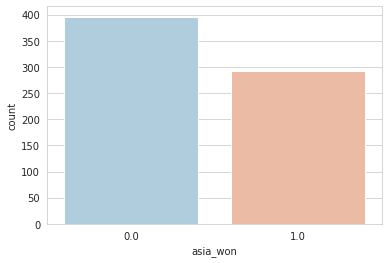

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='asia_won',data=asia_new,palette='RdBu_r')

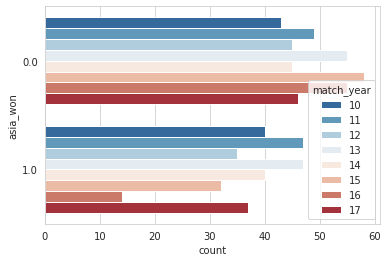

In [ ]:
sns.set_style('whitegrid')
sns.countplot(y='asia_won',hue='match_year',data=asia_new,palette='RdBu_r')

In [ ]:
asia_new.head()

,Team_1,Team_2,Winner,match_year,asia_won
0,Bangladesh,Sri Lanka,Sri Lanka,10,1.0
1,India,Sri Lanka,Sri Lanka,10,1.0
2,Bangladesh,India,India,10,1.0
3,Bangladesh,Sri Lanka,Sri Lanka,10,1.0
4,India,Sri Lanka,India,10,1.0


In [ ]:
final = pd.get_dummies(asia_new, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

In [ ]:
final.head()

,Winner,match_year,asia_won,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_1_Sri Lanka,Team_1_West Indies,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_West Indies
0,Sri Lanka,10,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Sri Lanka,10,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,India,10,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Sri Lanka,10,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,India,10,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
final.shape

(688, 23)

# **Splitting the dataset**

In [ ]:
X = final.drop(['Winner','asia_won'], axis=1)
y = final["asia_won"]

In [ ]:
X.head()

,match_year,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_1_Sri Lanka,Team_1_West Indies,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_West Indies
0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: asia_won, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
cricket_log = LogisticRegression()
cricket_log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = cricket_log.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_test.shape

(207,)

Evaluation

Confusion Matrix


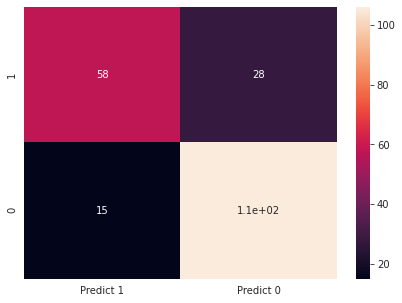

In [ ]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       121
         1.0       0.79      0.67      0.73        86

    accuracy                           0.79       207
   macro avg       0.79      0.78      0.78       207
weighted avg       0.79      0.79      0.79       207

[[106  15]
 [ 28  58]]


In [ ]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test,predictions))

0.7922705314009661


In [ ]:
yhat_prob= cricket_log.predict_proba(X_test)
#yhat_prob

In [ ]:
from sklearn.metrics import log_loss
print(log_loss(y_test,yhat_prob))

0.38956288991621674


# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtpred = dtree.predict(X_test)

Evaluation

In [ ]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

         0.0       0.72      0.84      0.78       121
         1.0       0.71      0.55      0.62        86

    accuracy                           0.72       207
   macro avg       0.72      0.69      0.70       207
weighted avg       0.72      0.72      0.71       207



In [ ]:
print(metrics.confusion_matrix(y_test,dtpred))

[[102  19]
 [ 39  47]]


Confusion Matrix


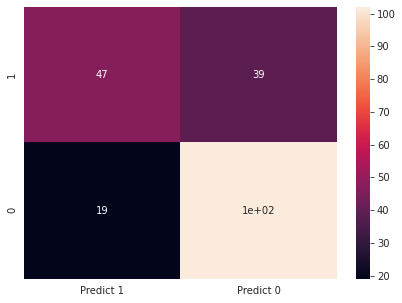

In [ ]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, dtpred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
print(jaccard_similarity_score(y_test,dtpred))

0.7198067632850241


# NAive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

cricket = GaussianNB()

cricket.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nbpredict = cricket.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_train, nbpredict)))
print()

Model Accuracy: 0.80



In [ ]:
nbtestpredict = cricket.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, nbtestpredict)))
print()

Model Accuracy: 0.80



**Evaluation**

Confusion Matrix


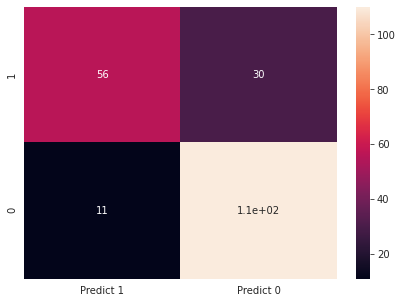

In [ ]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, nbtestpredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, nbtestpredict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.84      0.65      0.73        86
           0       0.79      0.91      0.84       121

    accuracy                           0.80       207
   macro avg       0.81      0.78      0.79       207
weighted avg       0.81      0.80      0.80       207



In [ ]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test,nbtestpredict))

0.8019323671497585


# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(X)
scaled_features

array([[-1.51493433, -0.10846523, -0.39535114, ..., -0.36016781,
         2.24390011, -0.33117581],
       [-1.51493433, -0.10846523, -0.39535114, ..., -0.36016781,
         2.24390011, -0.33117581],
       [-1.51493433, -0.10846523, -0.39535114, ..., -0.36016781,
        -0.44565264, -0.33117581],
       ...,
       [ 1.59368251, -0.10846523, -0.39535114, ..., -0.36016781,
         2.24390011, -0.33117581],
       [ 1.59368251, -0.10846523, -0.39535114, ..., -0.36016781,
        -0.44565264, -0.33117581],
       [ 1.59368251, -0.10846523, -0.39535114, ..., -0.36016781,
        -0.44565264, -0.33117581]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knnpred = knn.predict(X_test)

**Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test, knnpred))
print(classification_report(y_test, knnpred))

[[95 27]
 [23 62]]
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       122
         1.0       0.70      0.73      0.71        85

    accuracy                           0.76       207
   macro avg       0.75      0.75      0.75       207
weighted avg       0.76      0.76      0.76       207



Confusion Matrix


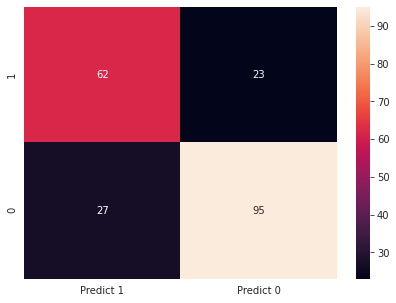

In [ ]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, knnpred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test,knnpred))

0.7584541062801933


In [ ]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

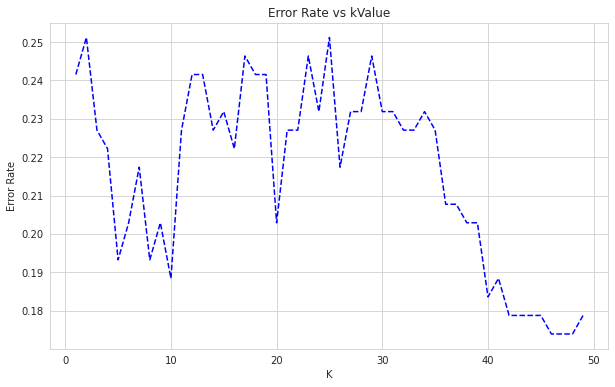

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate, color='blue',linestyle='dashed', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs kValue')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
accuracy_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    accuracy_rate.append(1-np.mean(pred_i!=y_test))

Text(0, 0.5, 'Accuracy Rate')

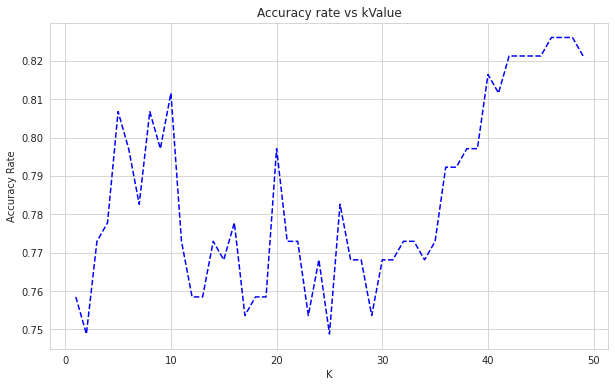

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy_rate, color='blue',linestyle='dashed', markerfacecolor='red', markersize=10)
plt.title('Accuracy rate vs kValue')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print('WITH K= 15')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K= 15


[[99 23]
 [25 60]]


              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       122
         1.0       0.72      0.71      0.71        85

    accuracy                           0.77       207
   macro avg       0.76      0.76      0.76       207
weighted avg       0.77      0.77      0.77       207



In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print('WITH K= 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K= 1


[[95 27]
 [23 62]]


              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       122
         1.0       0.70      0.73      0.71        85

    accuracy                           0.76       207
   macro avg       0.75      0.75      0.75       207
weighted avg       0.76      0.76      0.76       207



In [ ]:
knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print('WITH K= 24')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K= 24


[[102  20]
 [ 16  69]]


              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       122
         1.0       0.78      0.81      0.79        85

    accuracy                           0.83       207
   macro avg       0.82      0.82      0.82       207
weighted avg       0.83      0.83      0.83       207



In [ ]:
print(jaccard_similarity_score(y_test,pred))

0.8260869565217391
